# Nigerian Music scraped from Spotify - an analysis

In [1]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Kazan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Start where we finished in the last lesson, with data imported and filtered.

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("../data/nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


We will focus only on 3 genres. Maybe we can get 3 clusters built!

Text(0.5, 1.0, 'Top genres')

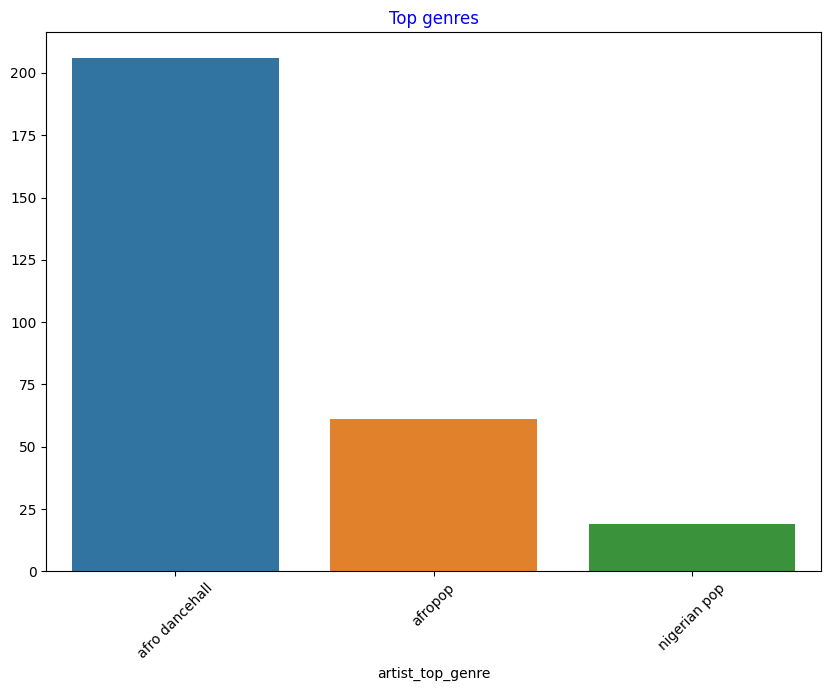

In [3]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [4]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4


In [9]:
df.columns[:3]

Index(['name', 'album', 'artist'], dtype='object')

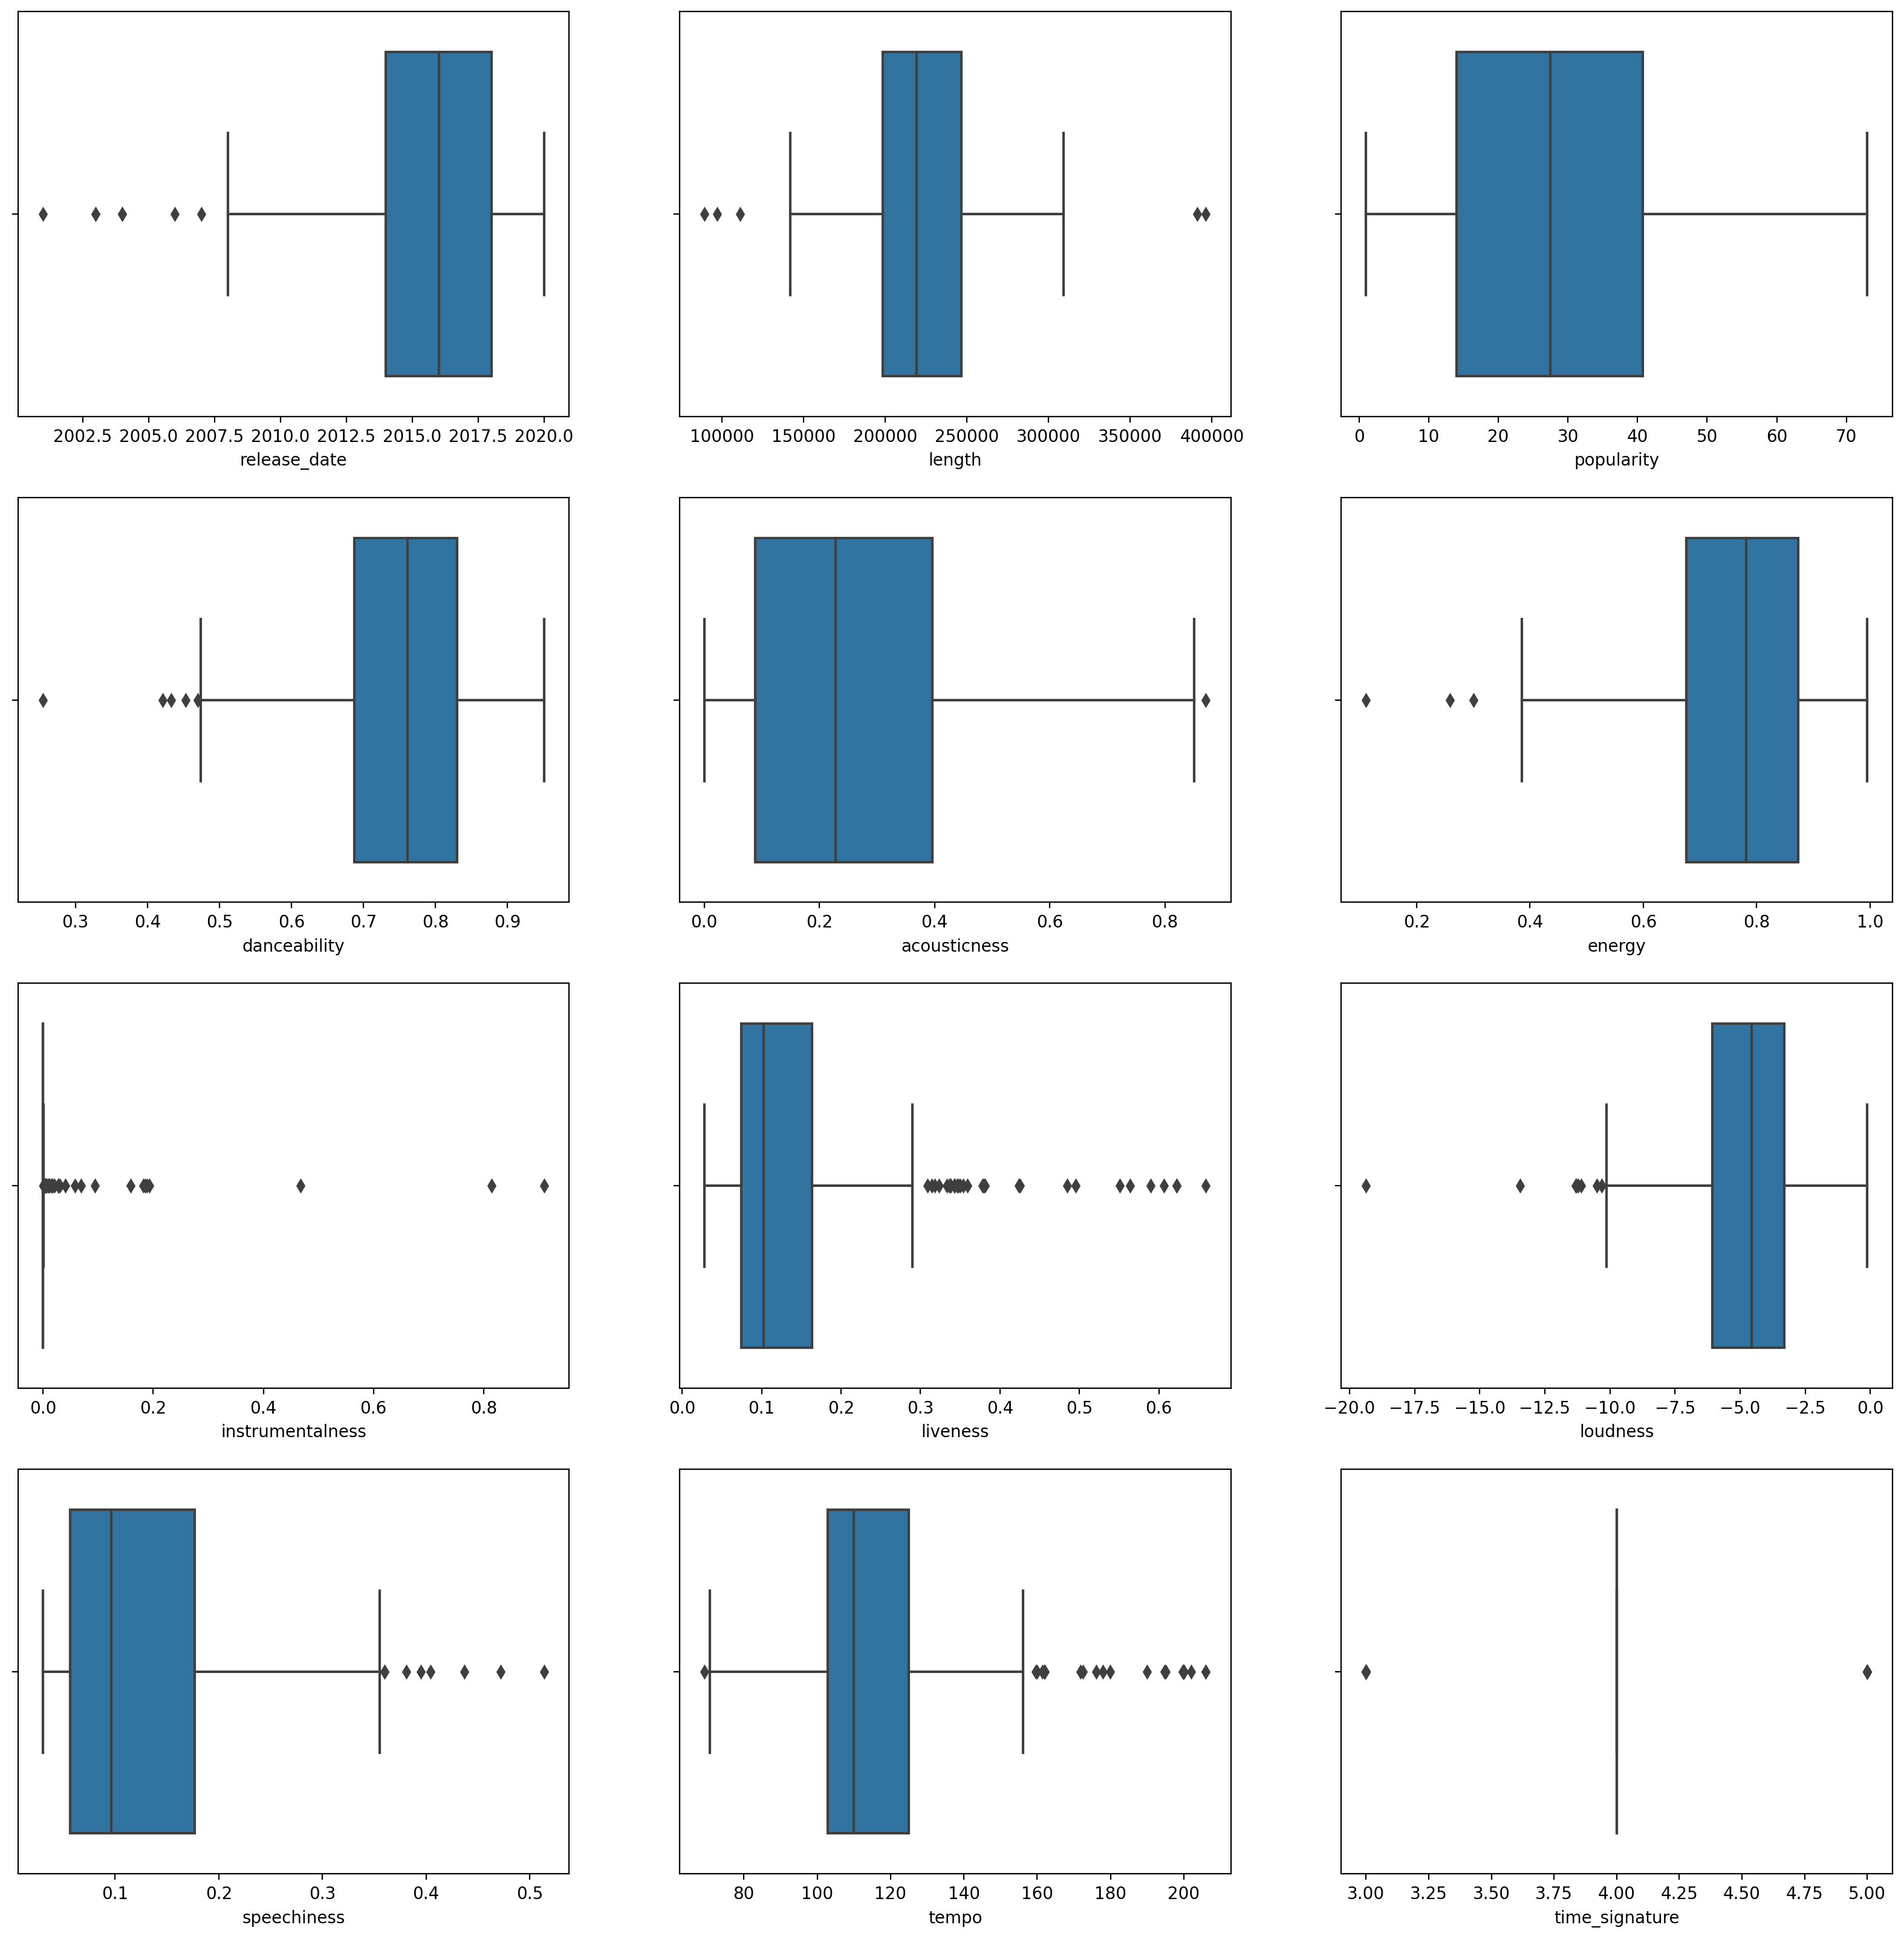

In [17]:
plt.figure(figsize=(20, 20), dpi=200)
for i, column in enumerate(df.columns[4:]):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=column,data=df)

plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

y = le.transform(y)


In [35]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans


C:\Users\Kazan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1])

In [23]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

In [36]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Kazan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kazan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kazan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

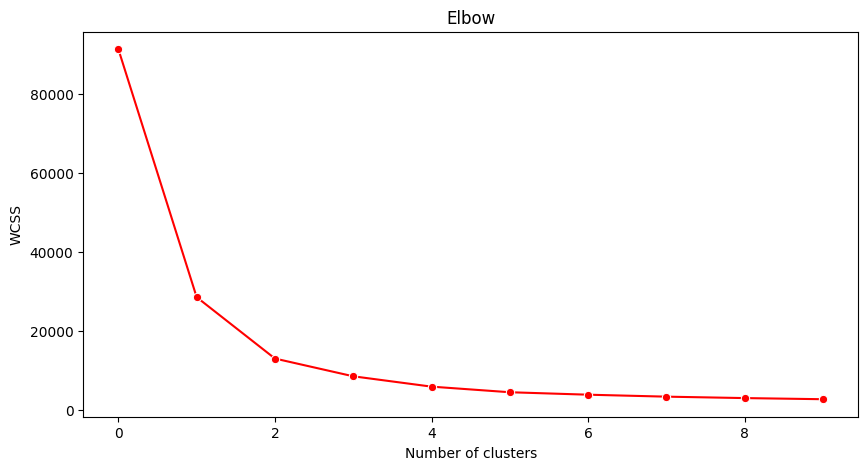

In [39]:
plt.figure(figsize=(10,5))
sns.lineplot(data=(wcss),marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\Kazan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


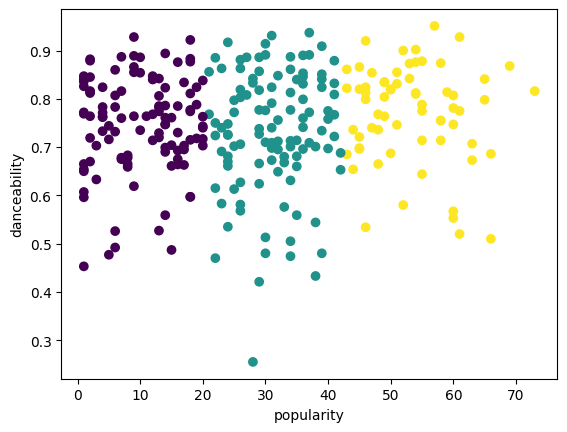

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [41]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 109 out of 286 samples were correctly labeled.
Accuracy score: 0.38
